### 패션 MNIST 데이터를 가지고 분류해 보기 --> 이미지 데이터

In [2]:
# !pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=bcef31f23637c1ed567ac956d9fcf3121a4e5b2fb7bf4e54b309f560ff38f7ee
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [1]:
# 만약 엑세스가 거부(Permissions Error)된다면 가상머신 사용 전 아나콘다를 끈 상태에서
# 프롬프트에 conda info --envs 코드를 입력하고 파일경로가 뜨면 거기에
# cd d: (change directory라는 뜻) 코드 입력 (이동이 안 되면 다시 한 번 d: 입력)
# ***D드라이브에서 지정해 주고 싶은 디렉토리가 있는 경우 --> cd (디렉토리 이름) 입력
# jupyter notebook 코드 입력하여 노트북이 실행되면 다시 가상머신 install

In [2]:
from tensorflow import keras

In [3]:
# 본래 학습/검증용 데이터를 나눌 때x_train, x_target, y_train, y_target으로 격차로 한 쌍이었다면,
# from sklearn.model_selection import train_test_split
# x_train, x_target, y_train, y_target = train_test_split()

# keras 클래스에서는 (x, y), (x, y)로 train끼리, target값끼리 튜플로 한 쌍을 이룸
(x_train,y_train),(x_target,y_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [5]:
x_train.shape, y_train.shape # 마찬가지로 28(가로) by 28(세로)이 하나인 이미지가 6만개 있음

((60000, 28, 28), (60000,))

In [6]:
x_target.shape, y_target.shape

((10000, 28, 28), (10000,))

In [7]:
import matplotlib.pyplot as plt

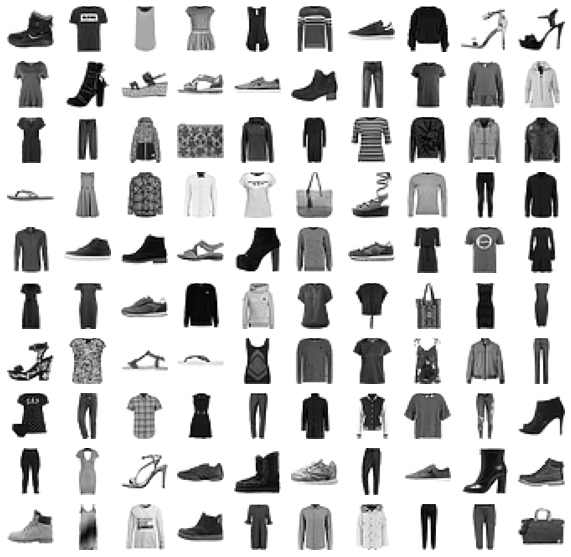

In [8]:
# 6만개를 다 그릴 순 없으므로
# 100개의 이미지만 확인해 보기

fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(x_train[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# 머신러닝, 로지스틱 회귀 이용하여 각각의 아이템 분류해 보기

In [9]:
# 전체 데이터를 다 사용하지 않고 하나씩 꺼내어 훈련하는 방법
# 조금씩 산을 내려가는 방법과 유사.....확률적 경사하강법 --> (기울기가 가파른 방향으로 흘러감)
#    (조금씩 배치하는 방법인 미니배치와 배치는 머신러닝에서는 제공하지 않고 딥러닝에서 다룸)

# SGDclassfier (확률적 경사하강법) --> 손실함수 이용 / 데이터 표준화 필요
# 데이터 표준화 방법 --> StandardScaler
# 보통 이미지를 표현하는 값의 범위는 0~255의 범위(개수로는 256개)를 갖는다.

# 데이터 표준화의 예)
# 0~10 사이의 임의의 데이터가 있다고 가정할 때, 이 데이터를 표준화 하기 위해 각각을 10으로 나누어 줌
# 값의 범위를 알고 있으면 해당 범위로 나누면 0~1사이의 값을 가지는 데이터를 만들 수 있음

In [10]:
x_train_scaled = x_train / 255 # 표준화 (0~1)
x_train_scaled.shape # 데이터 개수는 그대로 갖고 있는 상태

(60000, 28, 28)

In [11]:
# 위 데이터값을 SGDclassfier 클래스로 활용하기
# 28(가로)*(세로)인 것을 하나의 행으로 편 형태로(28*28) 변환
x_train_scaled = x_train_scaled.reshape(-1, 28*28) # 1차원으로 변환 --> 784개의 열
x_train_scaled.shape

(60000, 784)

In [12]:
from sklearn.linear_model import SGDClassifier # 확률적 경사하강법
from sklearn.model_selection import cross_validate # 교차 검증

# SGDClassfier의 max_iter의 디폴트값 : 1000 이므로 출력이 오래 걸리면 조정해 줄 필요가 있음

In [13]:
sc = SGDClassifier(loss='log', random_state=42)

In [14]:
scores = cross_validate(sc, x_train_scaled, y_train, n_jobs=-1)
# n_jobs=-1 --> 자원을 최대한 활용하여 최고의 성능을 발휘하도록 돌리도록 도와주는 함수 (속도 up)
scores

{'fit_time': array([ 96.25437164, 100.2887466 ,  94.47165775,  94.78516889,
         58.33965611]),
 'score_time': array([0.23686934, 0.14059258, 0.54902864, 0.36048794, 0.06248236]),
 'test_score': array([0.84825   , 0.84316667, 0.85      , 0.83441667, 0.83333333])}

In [15]:
scores['test_score'].mean()

0.8418333333333333

# 인공신경망을 이용하여 모델을 구성해 보기

In [16]:
# 인공신경망은 기본적으로 확률적 경사하강법을 사용하는 LogisticRegression과 유사함

# 인공신경망의 특징
# - 교차검증을 잘 사용하지 않음 (검증용데이터를 별도로 추출하여 사용함)
# - 데이터를 하나씩 가져와 가중치를 주어 각각의 z값을 계산하고 각 아이템을 분류하여 예측값(출력층)을 출력
# 즉 로지스틱 회귀 --> 가장 간단한 인공신경망이라고 할 수 있음 (성능이 좋아질지는 의문)
# 인공신경망을 만드는 최신 라이브러리들은 SGDClassfier에 없는 몇 가지 기능이 있음
#    --> tensorflow의 keras

In [17]:
import tensorflow as tf # 텐서플로우 자체를 가져오기도 함

In [18]:
# 위에서 scaling 한 학습용 데이터를 다시 훈련용과 검증용으로 분리하기 (8:2)
from sklearn.model_selection import train_test_split
x_train_sc, x_target_sc, y_train_sc, y_target_sc = train_test_split(x_train_scaled, y_train, test_size=0.2)
# y값을 찾기 위한 과정이므로 y_train값을 검증용 데이터로 훈련하고 target값은 나중에 최종 검증할 때 사용

# 원본 훈련 데이터에서 20%를 덜어냄

In [19]:
x_train_sc.shape, x_target_sc.shape, y_train_sc.shape, y_target_sc.shape
# 6만개 중 만 오천개가 검증용 데이터로 분류됨

((48000, 784), (12000, 784), (48000,), (12000,))

In [20]:
# 입력층과 출력층 사이에서 보조해주는 n개의 밀집층(은닉층)이 있음
# --> hidden later(히든 레이어) or dense layer : 눈에 보이지는 않지만 필터해 주는 역할
# 데이터를 분류하기 위해 모든 밀집층을 활용함
# 밀집층을 생성해 주기 위한 클래스 --> keras
# 객체만 받아와 모델을 만들어 준 이전과는 달리 인공지능은 디자인을 해 주어야 함 --> keras.laters.Dense

In [21]:
# 항상 입력층과 출력층으로 나뉘는데, 가운데 보조역할을 해 주는 밀집층이 없으면 기존의 경사하강법과 동일한데,
# 밀집층을 생성해 주면 입력층에서 하나의 과정을 더 거치는 것을 의미
# activation= : 활성화 함수
# 'softmax'를 지정 : 다중 분류 작업을 할 때 적용해 주는 함수
# input_shape : 입력층을 형성하므로 x_train_scaled 값을 25*25로 reshape해 준 값을 넣어줌

# 밀집층 하나 만듦 - 신경망 모델 디자인 (단, 하나만 만들게 되면 입력층의 역할을 하게 됨)
# 즉 두번째 dense부터가 밀집층
dens = keras.layers.Dense(10, activation='softmax', input_shape=(28*28,))
# 출력으로 내보낼 값의 개수(Dense) : 10 (정답의 개수)
# 이진 분류는 무조건 Dense : 1 (값이 둘 중 하나이기 때문)
# input_scape --> 모든 행(샘플)을 모두 한번씩 학습할 수 있도록 1열로 밀집층 만들어 준 것

# 다중 분류는 함수의 특성상 softmax를 활성화 함수를 사용하고,
# 이진 분류는 sigmoid 활성화 함수를 사용한다.

# 현재는 다중 분류를 하고 있는 상황

In [22]:
# 여러 개를 조합할 수 있는 신경망 모델 생성 (객체 생성)
model = keras.Sequential([dens])

In [28]:
# 여기에서 metrics는 평가방법을 의미
# 적용하기 --> 이 과정은 항상 동일함
#      여기에서는 fit 대신 compile를 이용

# 손실 함수는 줄이고 확률은 높이기
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy', # 다중 분류에서는 주로 크로스 엔트로피 손실함수를 사용
    metrics = ['accuracy']                    # (단, 이진 분류에서도 사용)
)

# 참고) 이진 분류의 경우 출력층이 1개 (확률값이 1개)

In [29]:
# 다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면
# 0 1 2 와 같이 정수로 된 타깃값을 원핫 인코딩으로 변환해야 함

# 단, 텐서플로우에서는 정수로 된 타깃값을 원핫으로 변환하지 않고 바로 사용 가능함 
# 따라서 정수로 된 타깃값을 크로스 엔트로피 손실을 계산하는 것이 --> 'sparse_categorical_crossentropy'
x_train_sc

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03529412, 0.        ,
        0.        ]])

In [36]:
temp = model.fit(x_train_sc, y_train_sc, epochs=5) # 훈련 횟수 : 5
# 훈련 횟수를 연속적으로 수정하여 다시 돌리면 훈련 횟수가 계속 누적됨

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3778 - accuracy: 0.8674
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8690
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8677
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8675
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3733 - accuracy: 0.8682


In [37]:
temp.history # loss값과 accuracy값 출력

{'loss': [0.3777763247489929,
  0.37544792890548706,
  0.3742203414440155,
  0.37420472502708435,
  0.37331682443618774],
 'accuracy': [0.867354154586792,
  0.8690208196640015,
  0.8677083253860474,
  0.867479145526886,
  0.8681666851043701]}

In [38]:
model.evaluate(x_target_sc, y_target_sc) # 손실, 정확도 출력

# 정확도가 약간 높아짐 
# 에포크값을 20으로 주었을 때는 오히려 정확도가 떨어짐 --> 성능이 그리 좋지는 않음

375/375 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.8561


[0.42033377289772034, 0.856083333492279]